## Processing Sept SW Cruise CTD data

In [2]:
! pip install seabird

In [8]:
from seabird.cnv import fCNV
from gsw import z_from_p
import numpy as np
from matplotlib import pyplot as plt


In [3]:
! ls data/sept_cruise/processed_ctd/

20210904decktest.cnv  T1C2.cnv	T6C1.cnv  T9C1.cnv
T1C1.cnv	      T1C3.cnv	T6C2.cnv  T9C2.cnv


In [46]:
t1c1 = fCNV('data/sept_cruise/processed_ctd/T1C1.cnv')
t1c2 = fCNV('data/sept_cruise/processed_ctd/T1C2.cnv')
t1c3 = fCNV('data/sept_cruise/processed_ctd/T1C3.cnv')

t6c1 = fCNV('data/sept_cruise/processed_ctd/T6C1.cnv')
t6c2 = fCNV('data/sept_cruise/processed_ctd/T6C2.cnv')

t9c1 = fCNV('data/sept_cruise/processed_ctd/T9C1.cnv')
t9c2 = fCNV('data/sept_cruise/processed_ctd/T9C2.cnv')

# these are ordered so they are shelf - eddy/GS
transects = [[t1c1,t1c2,t1c3],[t6c1,t6c2],[t9c2,t9c1]]

In [47]:
print("Header: %s" % transects[0][0].attributes.keys())
print("Data: %s" % transects[0][0].keys())

Header: dict_keys(['sbe_model', 'seasave', 'instrument_type', 'nquan', 'nvalues', 'start_time', 'bad_flag', 'file_type', 'md5', 'datetime', 'filename'])
Data: ['density', 'potemperature', 'PSAL', 'flECO-AFL', 'DEPTH', 'sbeopoxMm/Kg', 'sbeopoxPS', 'par/sat/log', 'ph', 'turbWETntu0', 'flag']


In [76]:
for transect in transects:
    for profile in transect:
        print(profile.attributes['start_time'])

Sep 05 2021 13:15:33 [System UTC, header]
Sep 05 2021 15:21:30 [System UTC, header]
Sep 05 2021 17:14:42 [System UTC, header]
Sep 06 2021 15:55:49 [System UTC, header]
Sep 06 2021 19:43:26 [System UTC, header]
Sep 07 2021 15:20:56 [System UTC, header]
Sep 07 2021 11:27:29 [System UTC, header]


In [58]:
plt.rcParams.update({'font.size': 13})

In [ ]:
Times
Sep 05 2021 13:15:33

---------------------------------------------------------------------------------------
T1C1.cnv
T1C2.cnv
T1C3.cnv


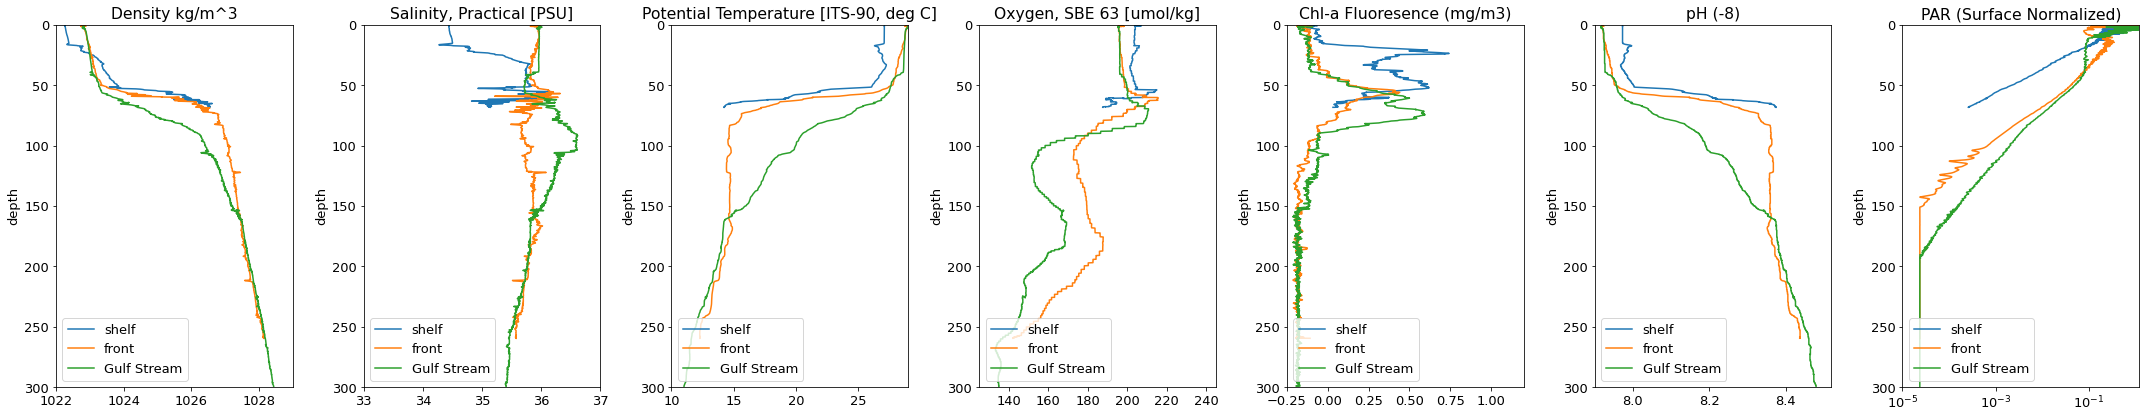

---------------------------------------------------------------------------------------
T6C1.cnv
T6C2.cnv


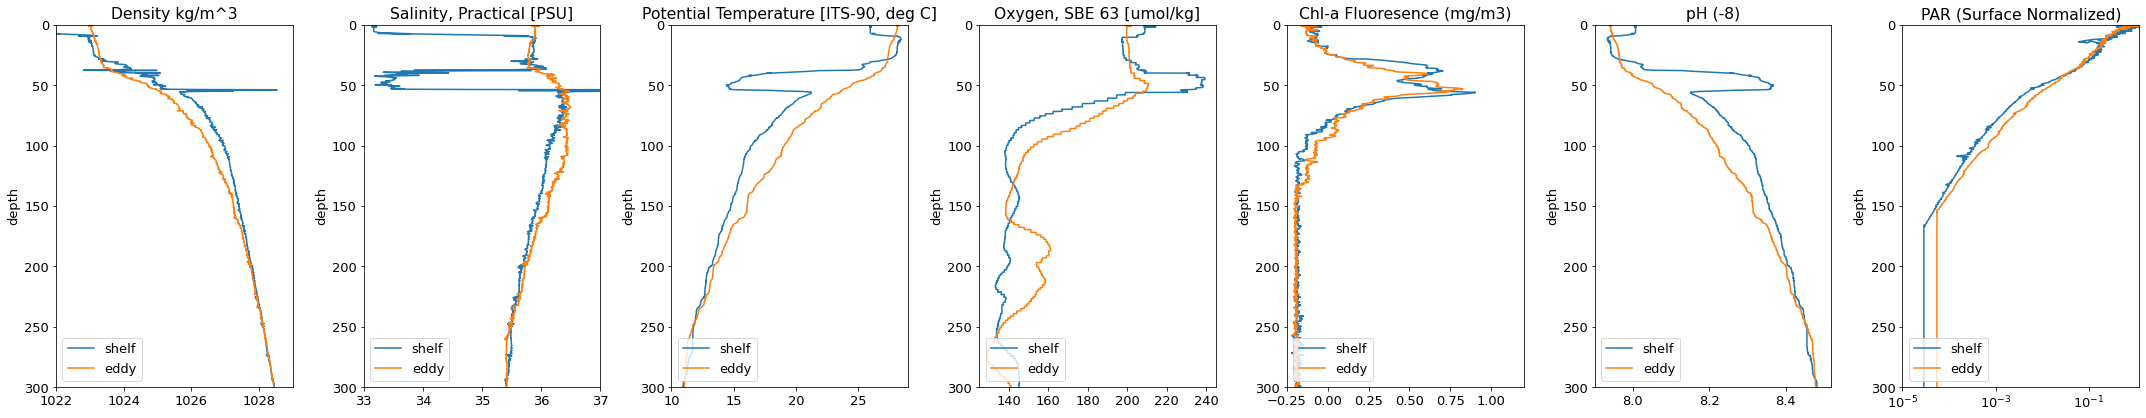

---------------------------------------------------------------------------------------
T9C2.cnv
T9C1.cnv


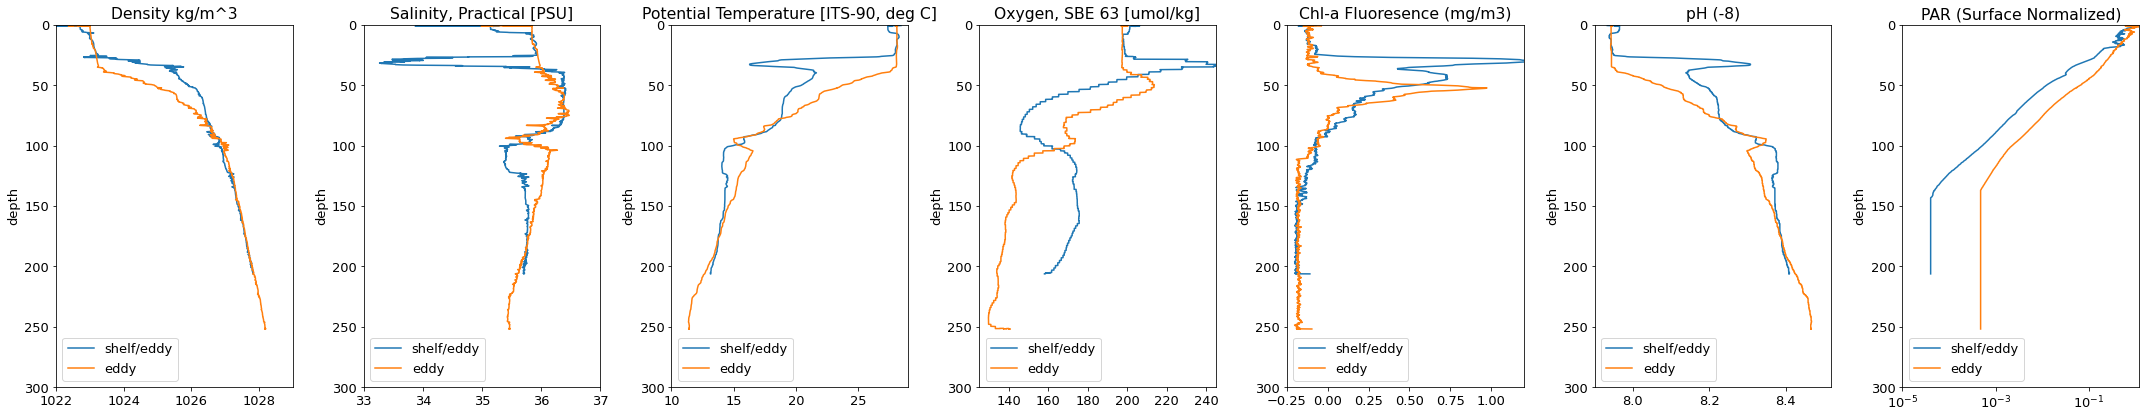

In [84]:
colors=['blue','red', 'orange']

# name 0 = density00: Density [density, kg/m^3]
# name 1 = potemp090C: Potential Temperature [ITS-90, deg C]
# name 2 = sal00: Salinity, Practical [PSU]
# name 3 = flECO-AFL: Fluorescence, WET Labs ECO-AFL/FL [mg/m^3]
# name 4 = depSM: Depth [salt water, m], lat = 35.00
# name 5 = sbeopoxMm/Kg: Oxygen, SBE 63 [umol/kg]
# name 6 = sbeopoxPS: Oxygen, SBE 63 [% saturation]
# name 7 = par/sat/log: PAR/Logarithmic, Satlantic
# name 8 = ph: pH
# name 9 = turbWETntu0: Turbidity, WET Labs ECO [NTU]
# name 10 = flag:  0.000e+00

ctd_vars = ['density','PSAL', 'potemperature', 'sbeopoxMm/Kg', 'flECO-AFL','ph', 'par/sat/log']
names = ['Density kg/m^3','Salinity, Practical [PSU]', 'Potential Temperature [ITS-90, deg C]', 'Oxygen, SBE 63 [umol/kg]', 'Chl-a Fluoresence (mg/m3)', 'pH (-8)', 'PAR (Surface Normalized)']
labels = [['shelf', 'front', 'Gulf Stream'], ['shelf', 'eddy'],['shelf/eddy', 'eddy']]

lims = [[1022,1029],[33,37],[10,29],[125,245],[-0.25,1.2],[15.9-8,16.52-8],[0.00001, 1.2]]

transect_names = ['transect1','transect6', 'transect9']

for oidx, transect in enumerate(transects):

    fig, ax = plt.subplots(1,7,figsize=(30,6))    
    
    print('---------------------------------------------------------------------------------------')
    for profile in transect:
        print(profile.attributes['filename'])
    

    for i, a in enumerate([ax[0],ax[1],ax[2],ax[3],ax[4],ax[5],ax[6]]):
        
        for j, profile in enumerate(transect):
            var_to_plot = profile[ctd_vars[i]]
            if ctd_vars[i] == 'flECO-AFL' or ctd_vars[i] == 'turbWETntu0':
                w=9
                var_to_plot = np.convolve(var_to_plot, np.ones(w), 'same') / w
            if ctd_vars[i] == 'par/sat/log':
                var_to_plot = var_to_plot.data / np.mean(var_to_plot.data[:10])
            if ctd_vars[i] == 'ph':
                var_to_plot = var_to_plot - 8
            a.plot(var_to_plot, profile['DEPTH'], alpha=1, label=labels[oidx][j])
            # plt.plot(profile['TEMP2'], z,'g')
    #         a.set_xlabel('temperature')
            a.set_ylabel('depth')
            a.set_ylim(300,0)
            a.set_xlim(lims[i][0],lims[i][1])
            if ctd_vars[i] == 'par/sat/log':
                a.set_xscale('log')
            a.set_title(names[i])
        a.legend(loc='lower left')
    fig.tight_layout()
    plt.savefig('ctd_data_'+transect_names[oidx]+'.png',dpi=450)
    plt.show()

array([1.03404831e+00, 1.10417563e+00, 9.66046443e-01, ...,
       4.76256325e-04, 4.76256325e-04, 4.76256325e-04])

78.1008